# **Pertanyaan Bisnis :**

**1. Mengidentifikasi Kategori Produk dengan Total Penjualan Paling Banyak dan Paling Sedikit yang dilakukan oleh Customers!**

**2. Tipe Transaksi Apa yang Paling diminati oleh Customers?**

**3. Mengidentifikasi Daerah dengan Tingkat Pembelian Paling Tinggi**

**4. 3 Pelanggan Terbaik Berdasarkan pada recency, frequency, dan monetary (RFM) Score!**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"

In [ ]:
%cd /content/drive/MyDrive/Kaggle

/content/drive/MyDrive/Kaggle


In [ ]:
ls

 customers_dataset.csv         order_payments_dataset.csv              products_dataset.csv
'E-Commerce Public Dataset'/   order_reviews_dataset.csv               sellers_dataset.csv
 geolocation_dataset.csv       orders_dataset.csv                      try.py
 order_items_dataset.csv       product_category_name_translation.csv


**Dat Wrangling**

In [ ]:
#Mengambil data dari drive dan assign ke dalam variabel df_customers
df_customers = pd.read_csv("/content/drive/MyDrive/Kaggle/customers_dataset.csv")
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
#Mengambil data dari drive dan assign ke dalam variabel df_order_items
df_order_items = pd.read_csv("/content/drive/MyDrive/Kaggle/order_items_dataset.csv")
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
#Mengambil data dari drive dan assign ke dalam variabel df_orders
df_orders = pd.read_csv("/content/drive/MyDrive/Kaggle/orders_dataset.csv")
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
#Mengambil data dari drive dan assign ke dalam variabel df_payments
df_payments = pd.read_csv("/content/drive/MyDrive/Kaggle/order_payments_dataset.csv")
df_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
#Mengambil data dari drive dan assign ke dalam variabel df_products
df_products = pd.read_csv("/content/drive/MyDrive/Kaggle/products_dataset.csv")
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
#Mengambil data dari drive dan assign ke dalam variabel df_products_translation
df_products_translation = pd.read_csv("/content/drive/MyDrive/Kaggle/product_category_name_translation.csv")
df_products_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
#Mengambil data dari drive dan assign ke dalam variabel df_sellers
df_sellers = pd.read_csv("/content/drive/MyDrive/Kaggle/sellers_dataset.csv")
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Merge Data

In [ ]:
#merge data products table and products category name translation menjadi df_products

df_products = df_products.merge(df_products_translation, left_on='product_category_name', right_on='product_category_name',how='left')

In [ ]:
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [ ]:
product = df_products[["product_id","product_category_name_english","product_category_name"]]
# df_product.head()
product.loc[product["product_category_name_english"].isnull()]

,product_id,product_category_name_english,product_category_name
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN
154,46b48281eb6d663ced748f324108c733,NaN,NaN
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN
...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN


In [ ]:
# menggabugkan table df_order_items dengan table product menjadi order_items

order_items = df_order_items.merge(product, left_on='product_id', right_on='product_id',how='left')

In [ ]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,ferramentas_jardim
...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,housewares,utilidades_domesticas
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,computers_accessories,informatica_acessorios
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,sports_leisure,esporte_lazer
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,computers_accessories,informatica_acessorios


In [ ]:
# menggabungkan table payments dengan table orders
df_payments = df_payments.drop(columns = ['payment_sequential','payment_installments'])
df_orders = df_orders.merge(df_payments, left_on='order_id', right_on='order_id',how='left')

In [ ]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,credit_card,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,voucher,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,voucher,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,boleto,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,credit_card,179.12


In [ ]:
# menggabungkan table customers dengan table orders
df_customer = df_customers.drop(columns = ['customer_unique_id'])
df_orders = df_orders.merge(df_customers, left_on='customer_id', right_on='customer_id',how='left')

In [ ]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,credit_card,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,voucher,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,voucher,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,boleto,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,credit_card,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [ ]:
#Menggabungkan seluruh tabel ke dalam df_all_joined
df_all_joined = pd.merge(
    left=order_items,
    right=df_orders,
    how="right",
    left_on="order_id",
    right_on="order_id"
)
print('Jumlah baris dan kolom all_joined_df:', df_all_joined.shape)
df_all_joined.head()

Jumlah baris dan kolom all_joined_df: (114346, 22)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,product_category_name,customer_id,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares,utilidades_domesticas,9ef432eb6251297304e76186b10a928d,...,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,credit_card,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares,utilidades_domesticas,9ef432eb6251297304e76186b10a928d,...,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,voucher,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares,utilidades_domesticas,9ef432eb6251297304e76186b10a928d,...,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,voucher,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumery,perfumaria,b0830fb4747a6c6d20dea0b8c802d7ef,...,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,boleto,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,auto,automotivo,41ce2a54c0b03bf3443c3d931a367089,...,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,credit_card,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [ ]:
df_all_joined.dtypes

order_id                                 object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
product_category_name_english            object
product_category_name                    object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
payment_type                             object
payment_value                           float64
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                           

In [ ]:
df_all_joined = df_all_joined.rename(columns={"order_purchase_timestamp": "order_date",
                                        "order_approved_at": "approved_date",
                                        "order_delivered_carrier_date": "shipped_date",
                                        "order_delivered_customer_date": "delivery_date"}
                               )

In [ ]:
#Menambahkan kolom baru bernama total_order_value yang merupakan hasil penjumlahan kolom price dan freight_value diletakkan pada index setelah kedua kolom tersebut

df_all_joined.insert(15, "total_order_value", df_all_joined.price + df_all_joined.freight_value)

In [ ]:
#Mellihat info kolom tabel df_all_joined
df_all_joined.info()
print('\nJumlah missing value all_joined_df:\n', df_all_joined.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114346 entries, 0 to 114345
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114346 non-null  object        
 1   order_item_id                  114346 non-null  int64         
 2   product_id                     114346 non-null  object        
 3   seller_id                      114346 non-null  object        
 4   shipping_limit_date            114346 non-null  datetime64[ns]
 5   price                          114346 non-null  float64       
 6   freight_value                  114346 non-null  float64       
 7   product_category_name_english  114346 non-null  object        
 8   product_category_name          114346 non-null  object        
 9   customer_id                    114346 non-null  object        
 10  order_status                   114346 non-null  object        
 11  

**Assesing Data**

In [ ]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   product_category_name_english  111023 non-null  object 
 8   product_category_name          111047 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 8.6+ MB


In [ ]:
print(order_items.shape)
order_items.isnull().sum()

(112650, 9)


order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name_english    1627
product_category_name            1603
dtype: int64

**Handling Data Type Table Order Items**

In [ ]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,ferramentas_jardim


In [ ]:
order_items.dtypes

order_id                          object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_category_name_english     object
product_category_name             object
dtype: object

In [ ]:
order_items['shipping_limit_date'] = pd.to_datetime(df_order_items['shipping_limit_date'])

In [ ]:
order_items.dtypes

order_id                                 object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
product_category_name_english            object
product_category_name                    object
dtype: object

**Handling Missing Value**

In [ ]:
# missing value pada kolom product_category_name_english dan category name
order_items.isnull().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name_english    1627
product_category_name            1603
dtype: int64

In [ ]:
x = order_items.loc[order_items["product_category_name"].notnull() & order_items["product_category_name_english"].isnull()]
set(x["product_category_name"])

{'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'}

In [ ]:
order_items['product_category_name'].fillna('not defined', inplace=True)
order_items['product_category_name_english'].fillna('not defined', inplace=True)

order_items["product_category_name_english"] = np.where(order_items["product_category_name"] == 'pc_gamer', 'PC Gaming', order_items["product_category_name_english"])
order_items["product_category_name_english"] = np.where(order_items["product_category_name"] == 'portateis_cozinha_e_preparadores_de_alimentos', 'portable kitchen food preparers', order_items["product_category_name_english"])

In [ ]:
order_items.isnull().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name_english    0
product_category_name            0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", order_items.duplicated().sum())
order_items.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Handling missing values**

In [ ]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103887 entries, 0 to 103886
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       103887 non-null  object 
 1   customer_id                    103887 non-null  object 
 2   order_status                   103887 non-null  object 
 3   order_purchase_timestamp       103887 non-null  object 
 4   order_approved_at              103712 non-null  object 
 5   order_delivered_carrier_date   101999 non-null  object 
 6   order_delivered_customer_date  100755 non-null  object 
 7   order_estimated_delivery_date  103887 non-null  object 
 8   payment_type                   103886 non-null  object 
 9   payment_value                  103886 non-null  float64
 10  customer_unique_id             103887 non-null  object 
 11  customer_zip_code_prefix       103887 non-null  int64  
 12  customer_city                 

In [ ]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
payment_type                        1
payment_value                       1
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [ ]:
df_orders.dropna(axis=0, inplace=True)

In [ ]:
df_orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_type                     0
payment_value                    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", df_orders.duplicated().sum())
df_orders.describe()

Jumlah duplikasi:  582


,payment_value,customer_zip_code_prefix
count,100739.000000,100739.000000
mean,153.065673,35126.620356
std,214.465614,29779.959615
min,0.000000,1003.000000
25%,56.780000,11385.000000
50%,100.000000,24421.000000
75%,171.290000,58702.000000
max,13664.080000,99980.000000


In [ ]:
df_orders.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", df_orders.duplicated().sum())

Jumlah duplikasi:  0


**Handling Data Type Table Orders**

In [ ]:
df_orders.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
payment_type                      object
payment_value                    float64
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
dtype: object

In [ ]:
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])
df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders['order_delivered_carrier_date'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])

In [ ]:
df_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
payment_type                             object
payment_value                           float64
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
dtype: object

**Exploratory Data Analysis**

In [ ]:
order_items.describe(include="all")

<ipython-input-42-34313681f422>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_items.describe(include="all")


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,product_category_name
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,112650,112650
unique,98666,NaN,32951,3095,93318,NaN,NaN,74,74
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN,bed_bath_table,cama_mesa_banho
freq,21,NaN,527,2033,21,NaN,NaN,11115,11115
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320,NaN,NaN
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,NaN


Pada table order_items dapat dilihat bahwa  product category paling laris adalah bed_bath_table

Payment Type

In [ ]:
df_orders.groupby(by="payment_type").payment_value.mean().sort_values(ascending=False)

payment_type
credit_card    162.238809
boleto         144.338425
debit_card     140.112377
voucher         66.599196
Name: payment_value, dtype: float64

In [ ]:
df_orders.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    74302
boleto         19177
voucher         3679
debit_card      1484
Name: order_id, dtype: int64

Berdasarkan hasil data diatas tipe transaksi yang paling banyak digunakan adalah tipe credit card dibandingkan tipe yang lainnya sejumlah 74302 kali.

In [ ]:
df_orders.describe(include="all")

<ipython-input-45-776a2e041a6b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_orders.describe(include="all")
<ipython-input-45-776a2e041a6b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_orders.describe(include="all")
<ipython-input-45-776a2e041a6b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_orders.describe(include="all")
<ipython-input-45-776a2e041a6b>:1: FutureWarni

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,100157,100157,100157,100157,100157,100157,100157,100157,100157,100157.000000,100157,100157.000000,100157,100157
unique,96460,96460,2,95938,88271,80099,95648,444,4,NaN,93341,NaN,4085,27
top,ccf804e764ed5650cd8759557269dc13,92cd3ec6e2d643d4ebd0e3d6238f69e2,delivered,2017-06-07 12:05:10,2017-06-09 16:15:08,2018-05-09 15:48:00,2017-06-22 16:04:46,2017-12-20 00:00:00,credit_card,NaN,f9ae226291893fda10af7965268fb7f6,NaN,sao paulo,SP
freq,22,22,100151,22,22,47,22,544,74572,NaN,23,NaN,15586,42029
first,NaN,NaN,NaN,2016-10-03 09:44:50,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153.782414,NaN,35138.780325,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214.851697,NaN,29786.702890,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.390000,NaN,11390.000000,NaN,NaN


In [ ]:
#Melihat jumlah pelanggan berdasarkan customer_city
customers_in_cities = df_orders.groupby(by="customer_city").customer_unique_id.nunique().sort_values(ascending=False).reset_index()
customers_in_cities.head(10)

,customer_city,customer_unique_id
0,sao paulo,14528
1,rio de janeiro,6363
2,belo horizonte,2606
3,brasilia,2013
4,curitiba,1434
5,campinas,1363
6,porto alegre,1291
7,salvador,1154
8,guarulhos,1110
9,sao bernardo do campo,881


In [ ]:
#Melihat jumlah pelanggan berdasarkan customer_state
customers_in_states = df_orders.groupby(by="customer_state").customer_unique_id.nunique().sort_values(ascending=False).reset_index()
customers_in_states.head(10)

,customer_state,customer_unique_id
0,SP,39144
1,RJ,11918
2,MG,10999
3,RS,5165
4,PR,4769
5,SC,3450
6,BA,3158
7,DF,2019
8,ES,1928
9,GO,1895


RFM Analysis

In [ ]:
df_rfm = df_all_joined.groupby(by="customer_unique_id", as_index=False).agg(
    max_order_date = ("order_date", "max"), # mengambil tanggal order terakhir
    frequency = ("order_id", "nunique"), # menghitung jumlah order
    monetary = ("total_order_value", "sum") # menghitung total jumlah uang untuk pemesanan
    )

df_rfm['max_order_date'] = df_rfm['max_order_date'].dt.date #mengubah menjadi format tanggal
recent_order_date = df_all_joined['order_date'].dt.date.max() #memilih hari terakhir dalam kolom order_date
df_rfm.insert(1,'recency', df_rfm['max_order_date'].apply(lambda x: (recent_order_date - x).days)) #mencari selisih kapan terakhir pelanggan bertransaksi
df_rfm.drop('max_order_date', axis=1, inplace=True) #menghapus kolom yang tidak dibutuhkan
df_rfm.head(10)

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89
5,0004bd2a26a76fe21f786e4fbd80607f,146,1,166.98
6,00050ab1314c0e55a6ca13cf7181fecf,131,1,35.38
7,00053a61a98854899e70ed204dd4bafe,182,1,419.18
8,0005e1862207bf6ccc02e4228effd9a0,543,1,150.12
9,0005ef4cd20d2893f0d9fbd94d3c0d97,170,1,129.76


In [ ]:
#Melihat deskripsi statistik df_rfm
df_rfm.describe()

,recency,frequency,monetary
count,93341.000000,93341.000000,93341.000000
mean,237.459637,1.033415,171.558973
std,152.580705,0.209092,248.739884
min,0.000000,1.000000,10.070000
25%,114.000000,1.000000,63.990000
50%,218.000000,1.000000,110.260000
75%,346.000000,1.000000,187.530000
max,695.000000,15.000000,13664.080000


In [ ]:
#Melihat pelanggan yang terakhir kali memesan
df_rfm.sort_values(by='recency', ascending=True)

,customer_unique_id,recency,frequency,monetary
4587,0c6d7218d5f3fa14514fd29865269993,0,1,178.25
13430,24ac2b4327e25baf39f2119e4228976a,0,1,93.75
1510,0421e7a23f21e5d54efed456aedbc513,0,1,119.42
12423,21dbe8eabd00b34492a939c540e2b1a7,0,1,14.29
33808,5c58de6fb80e93396e2f35642666b693,0,1,510.96
...,...,...,...,...
49403,87776adb449c551e74c13fc34f036105,695,1,40.95
51392,8d3a54507421dbd2ce0a1d58046826e0,695,1,133.46
42233,7390ed59fa1febbfda31a80b4318c8cb,695,1,154.57
67445,b8b8726af116a5cfb35b0315ecef9172,695,1,35.61


In [ ]:
#Melihat pelanggan yang sering order
df_rfm.sort_values(by='frequency', ascending=False)

,customer_unique_id,recency,frequency,monetary
51423,8d50f5eadf50201ccdcedfb9e2ac8455,9,15,879.27
22775,3e43e6105506432c953e165fb2acf44c,183,9,1172.67
10058,1b6c7548a2a1f9037c1fd3ddfed95f33,196,7,1021.12
36702,6469f99c1f9dfae7733b25662e7f1782,62,7,758.83
73908,ca77025e7201e3b30c44b472ff346268,89,7,1122.72
...,...,...,...,...
31558,5657dfebff5868c4dc7e8355fea865c4,291,1,105.38
31557,5657596addb4d7b07b32cd330614bdf8,299,1,189.26
31556,5656eb169546146caeab56c3ffc3d268,34,1,128.87
31555,5656a8fabc8629ff96b2bc14f8c09a27,272,1,28.13


In [ ]:
#Melihat pelanggan yang menghabiskan uang paling banyak untuk order
df_rfm.sort_values(by='monetary', ascending=False)

,customer_unique_id,recency,frequency,monetary
3724,0a0a92112bd4c708ca5fde585afaa872,334,1,13664.08
48727,85963fd37bfd387aa6d915d8a1065486,196,1,10553.28
69545,be74c431147c32ab2d7c7cef5e4a995f,111,1,8618.76
86873,edf81e1f3070b9dac83ec83dacdbb9bc,498,1,8389.52
32272,58483a1c055dfb600f57c5b867174542,85,1,8068.88
...,...,...,...,...
46992,809ca96e9696b9be5f69cd7ae803049d,459,1,12.28
14796,2878e5b88167faab17d4fb83a986d38b,304,1,11.63
40693,6f5b9d1cdccc4d28f0483a612edecacf,361,1,11.63
65449,b33336f46234b24a613ad9064d13106d,69,1,10.89


**Visualization dan Explanatory Analysis**

**Q1: Kategori Produk dengan Total Penjualan Paling Banyak dan Paling Sedikit yang dilakukan oleh Customers!**

In [ ]:
order_by_product_category = df_all_joined.groupby(by="product_category_name_english").agg(num_of_order = ('order_id','count'), sum_order_value = ('total_order_value', 'sum')).reset_index()
order_by_product_category.sort_values(by=['num_of_order','sum_order_value'], ascending=False).head(10)

,product_category_name_english,num_of_order,sum_order_value
8,bed_bath_table,11552,1285166.14
44,health_beauty,9707,1448368.08
68,sports_leisure,8677,1153614.26
40,furniture_decor,8517,918308.89
16,computers_accessories,7885,1065789.09
50,housewares,7123,794458.38
73,watches_gifts,6036,1311551.40
71,telephony,4572,393111.32
43,garden_tools,4435,590332.13
6,auto,4267,694387.02


In [ ]:
#Melihat kategori produk dengan jumlah order terendah
order_by_product_category.sort_values('num_of_order', ascending=True).head(10) #Menyortir nilai terendah

,product_category_name_english,num_of_order,sum_order_value
64,security_and_services,2,324.51
30,fashion_childrens_clothes,7,598.67
0,PC Gaming,9,1575.17
63,portable kitchen food preparers,14,4228.05
12,cds_dvds_musicals,14,954.99
53,la_cuisine,16,2690.87
4,arts_and_craftmanship,24,2184.14
33,fashion_sport,29,2657.55
47,home_comfort_2,31,1194.44
36,flowers,33,1598.91


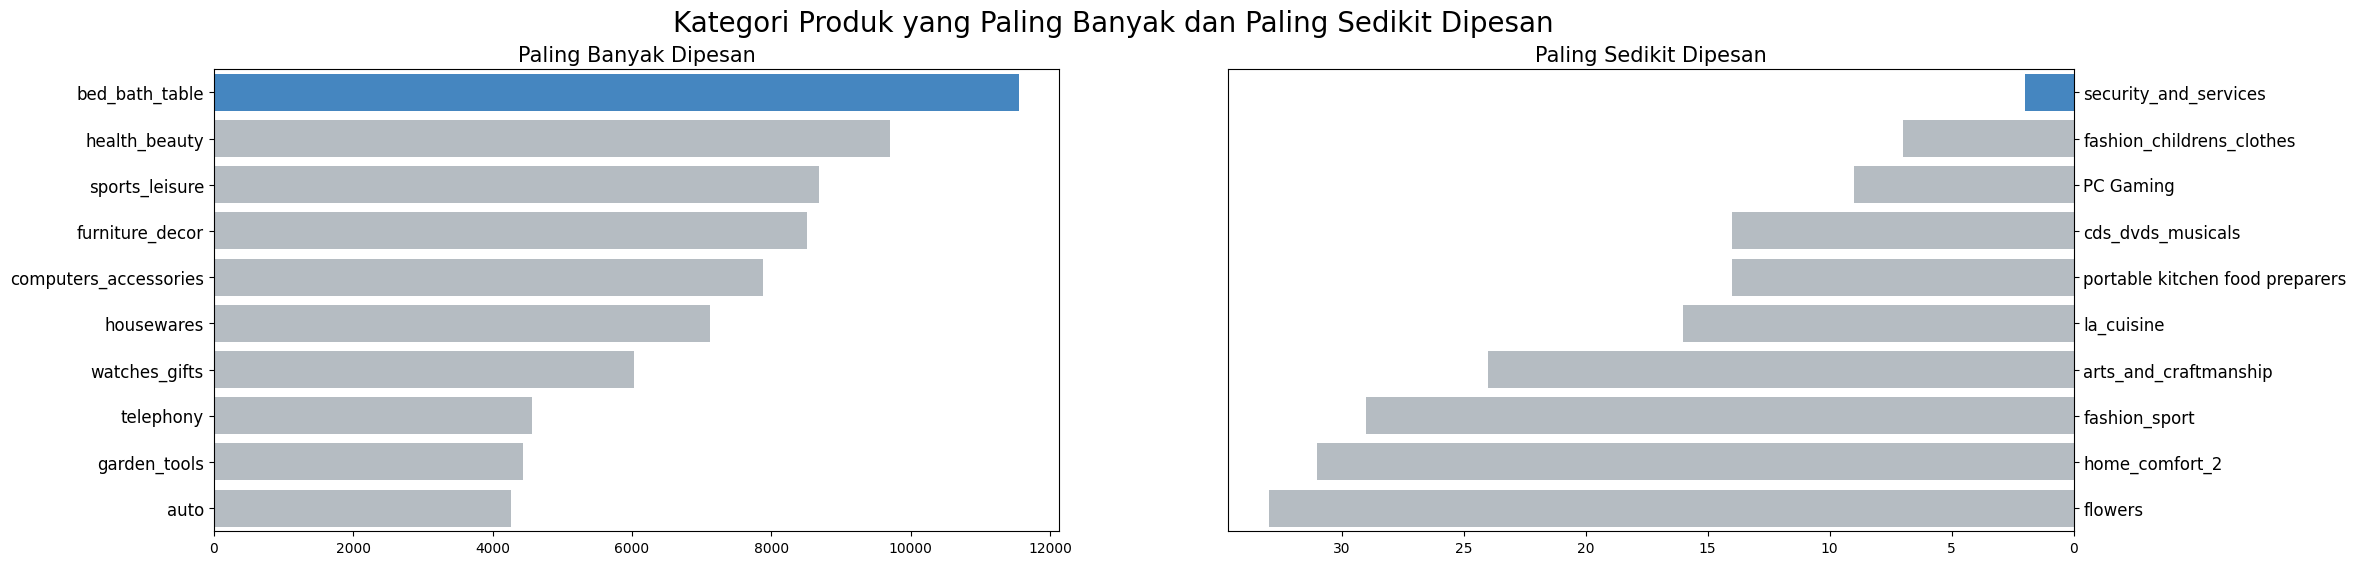

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]
sns.barplot(
    x="num_of_order",
    y="product_category_name_english",
    data= order_by_product_category.sort_values(by=['num_of_order','sum_order_value'], ascending=False).head(10),
    palette=colors,
    ax=ax[0]
    )
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Paling Banyak Dipesan", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(
    x="num_of_order",
    y="product_category_name_english",
    data= order_by_product_category.sort_values(by=['num_of_order','sum_order_value'], ascending=True).head(10),
    palette=colors,
    ax=ax[1]
    )
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Paling Sedikit Dipesan", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
plt.suptitle("Kategori Produk yang Paling Banyak dan Paling Sedikit Dipesan", fontsize=20)
plt.show()

**Q2 : Tipe transaksi apa yang paling diminati oleh customers?**

In [ ]:
info_payment = df_all_joined.groupby(by="payment_type")["payment_value"].mean().reset_index()
info_payment

,payment_type,payment_value
0,boleto,176.354729
1,credit_card,178.919161
2,debit_card,149.046140
3,voucher,69.053119


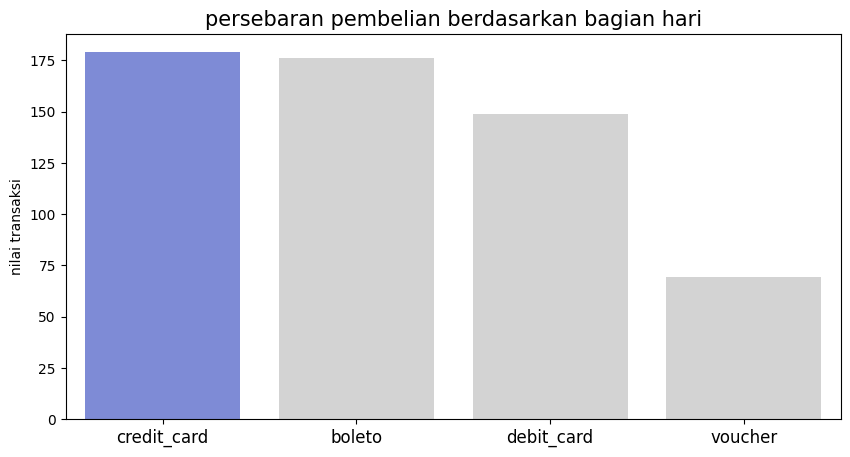

In [ ]:
plt.figure(figsize=(10, 5))

colors = ["#6f80e5", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="payment_type",
    y="payment_value",
    data=info_payment.sort_values(by="payment_value", ascending = False),
    palette=colors
)
plt.title("persebaran pembelian berdasarkan bagian hari", loc="center", fontsize=15)
plt.ylabel("nilai transaksi")
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Text(0.5, 1.0, 'Payment Type Distribution')

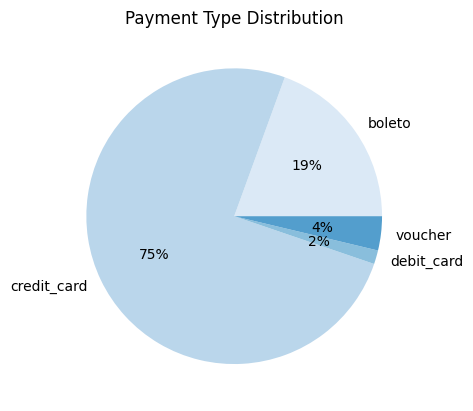

In [ ]:
df_payment_info = df_all_joined.groupby(by="payment_type")["order_id"].nunique().reset_index()
palette_color = sns.color_palette('Blues')

plt.pie(df_payment_info["order_id"], labels=df_payment_info["payment_type"], colors=palette_color, autopct='%.0f%%')
plt.title("Payment Type Distribution")

**Q3 : Mengidentifikasi Daerah dengan Tingkat Customers Paling Tinggi!**

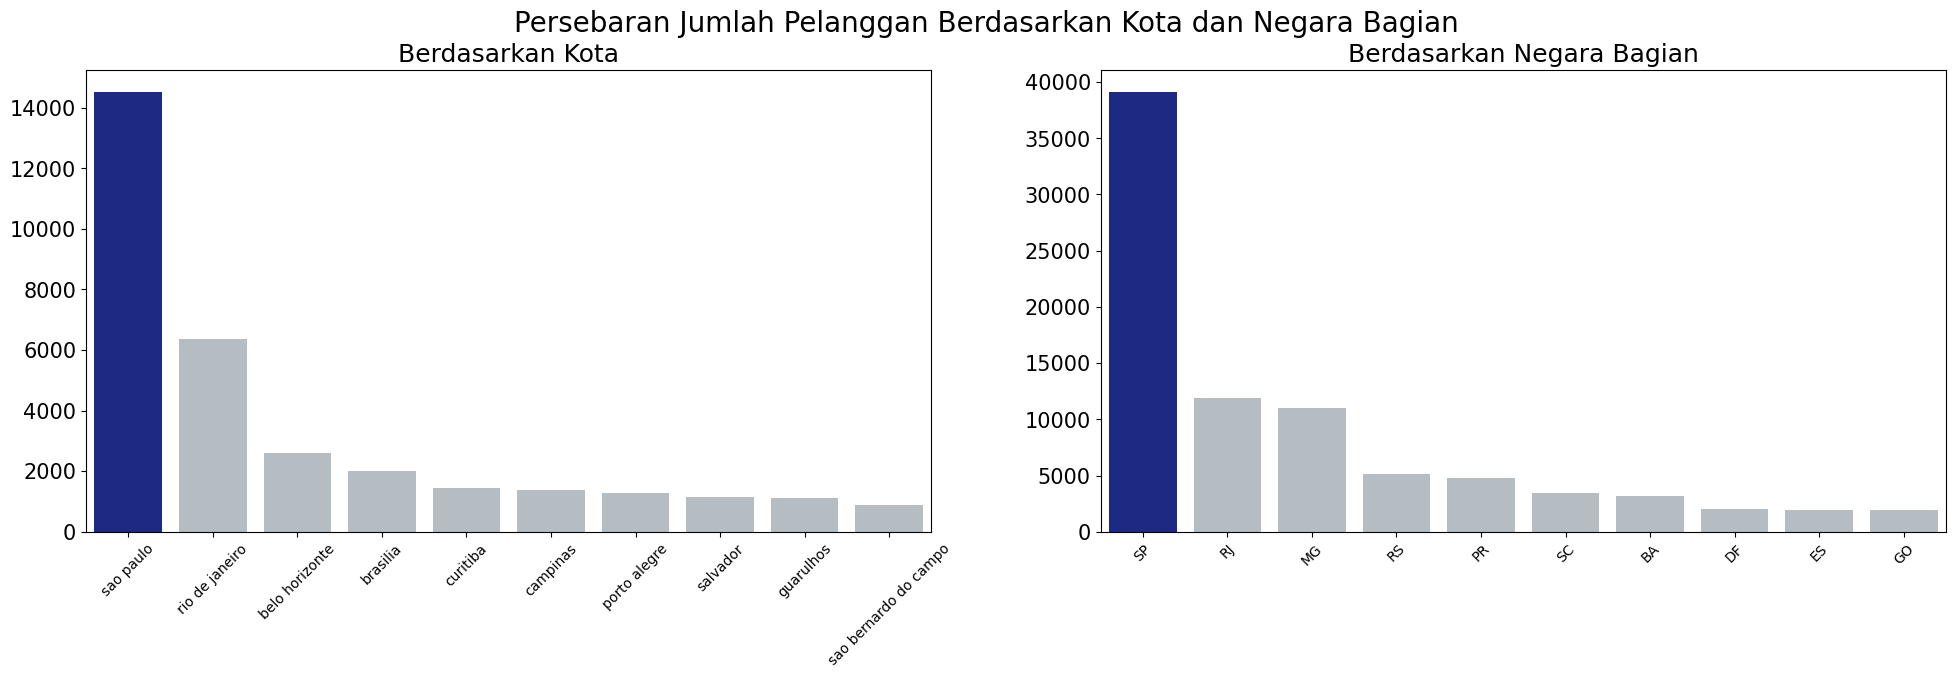

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#0b1e94", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x="customer_city", y="customer_unique_id", data= customers_in_cities.head(10), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].set_title("Berdasarkan Kota", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="customer_state", y="customer_unique_id", data= customers_in_states.head(10), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].set_title("Berdasarkan Negara Bagian", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Persebaran Jumlah Pelanggan Berdasarkan Kota dan Negara Bagian", fontsize=20)
plt.show()

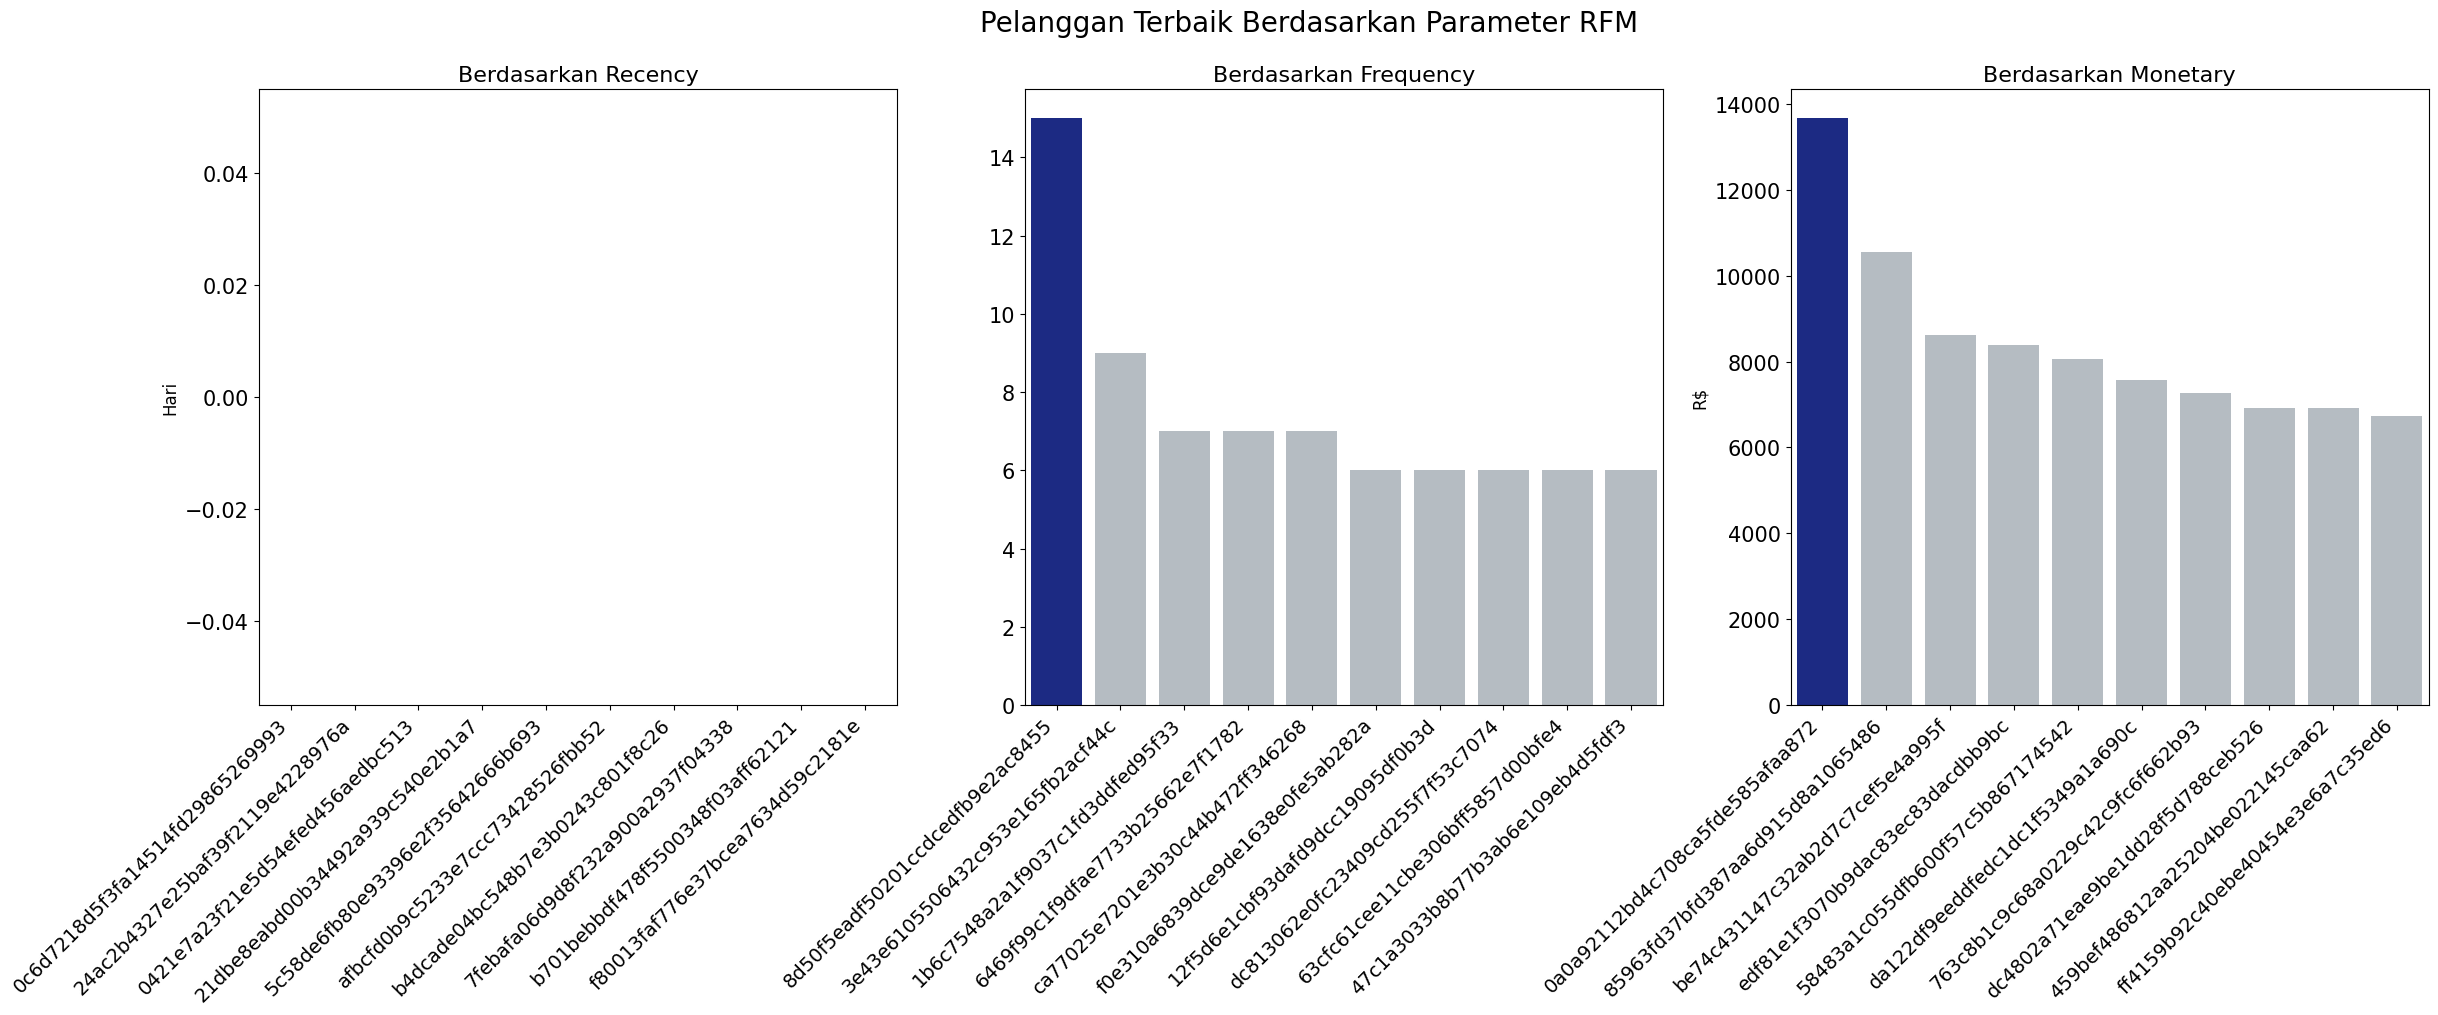

In [ ]:
#RFM ANALYSIS

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(28, 8))
colors = ["#0b1e94", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x="customer_unique_id", y="recency", data= df_rfm.sort_values(by='recency', ascending=True).head(10), palette=colors, ax=ax[0])
ax[0].set_ylabel('Hari', fontsize=12)
ax[0].set_xlabel(None)
ax[0].set_title("Berdasarkan Recency", loc="center", fontsize=16)
ax[0].tick_params(axis ='y', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)

sns.barplot(x="customer_unique_id", y="frequency", data= df_rfm.sort_values(by='frequency', ascending=False).head(10), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Berdasarkan Frequency", loc="center", fontsize=16)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)

sns.barplot(x="customer_unique_id", y="monetary", data= df_rfm.sort_values(by='monetary', ascending=False).head(10), palette=colors, ax=ax[2])
ax[2].set_ylabel('R$', fontsize=12)
ax[2].set_xlabel(None)
ax[2].set_title("Berdasarkan Monetary", loc="center", fontsize=16)
ax[2].tick_params(axis ='y', labelsize=15)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)

plt.suptitle("Pelanggan Terbaik Berdasarkan Parameter RFM", fontsize=20)
plt.show()

In [ ]:
#Melihat Pembagian Segmen Pelanggan Berdasarkan RFM Score
df_rfm.customer_segment.value_counts()

Low Value Customer     90541
Top Customer            1725
High Value Customer     1075
Name: customer_segment, dtype: int64

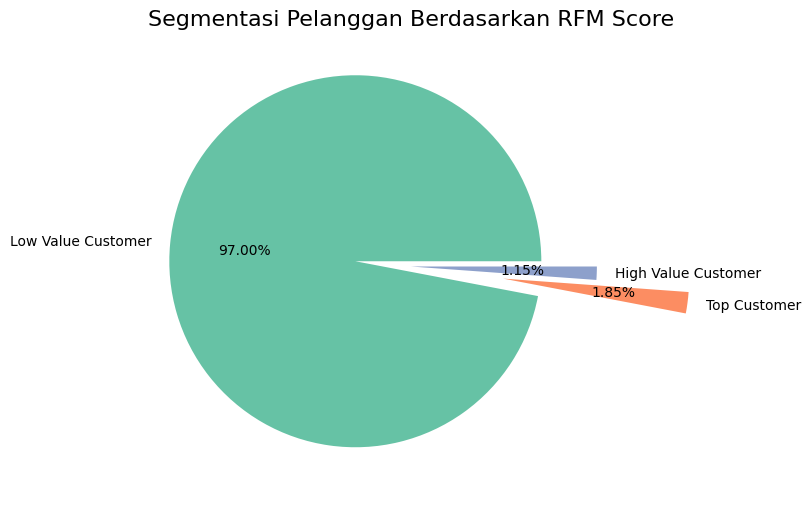

In [ ]:
plt.figure(figsize=(6,8))
plt.pie(
    df_rfm.customer_segment.value_counts(),
    labels= df_rfm.customer_segment.value_counts().index,
    autopct= '%1.2f%%',
    explode = [0.3, 0.5, 0],
    colors= sns.color_palette('Set2')
)
plt.title("Segmentasi Pelanggan Berdasarkan RFM Score", loc='center', fontsize=16)
plt.show()

In [ ]:
#Melihat pelanggan yang memiliki RFM Score dan Monetary Score tertinggi
df_rfm.sort_values(by=['RFM_Score', 'monetary'],ascending=False).head(20)

,customer_unique_id,recency,frequency,monetary,RFM_Score,customer_segment
80523,dc813062e0fc23409cd255f7f53c7074,6,6,1033.62,5.00,Top Customer
51423,8d50f5eadf50201ccdcedfb9e2ac8455,9,15,879.27,4.99,Top Customer
90737,f8bc1d81f395f6239a2a5ab1b9edf1ab,9,3,515.10,4.99,Top Customer
57212,9cc5a07f169a1606fd347a56683e6ea6,7,4,419.25,4.99,Top Customer
44324,795c1622cf7a53d63d324e862349d01c,12,4,354.23,4.99,Top Customer
80449,dc48b0a1b0e6abb6586f322c189f6b93,9,3,327.39,4.99,Top Customer
19290,34b0cd95480e55c2a701293a2b9671b3,1,3,295.57,4.99,Top Customer
83686,e53fd5575f1418397aae732c5755b6fc,9,3,132.03,4.99,Top Customer
81974,e0836a97eaae86ac4adc26fbb334a527,2,3,88.27,4.99,Top Customer
29108,4facc2e6fbc2bffab2fea92d2b4aa7e4,16,4,1760.75,4.98,Top Customer


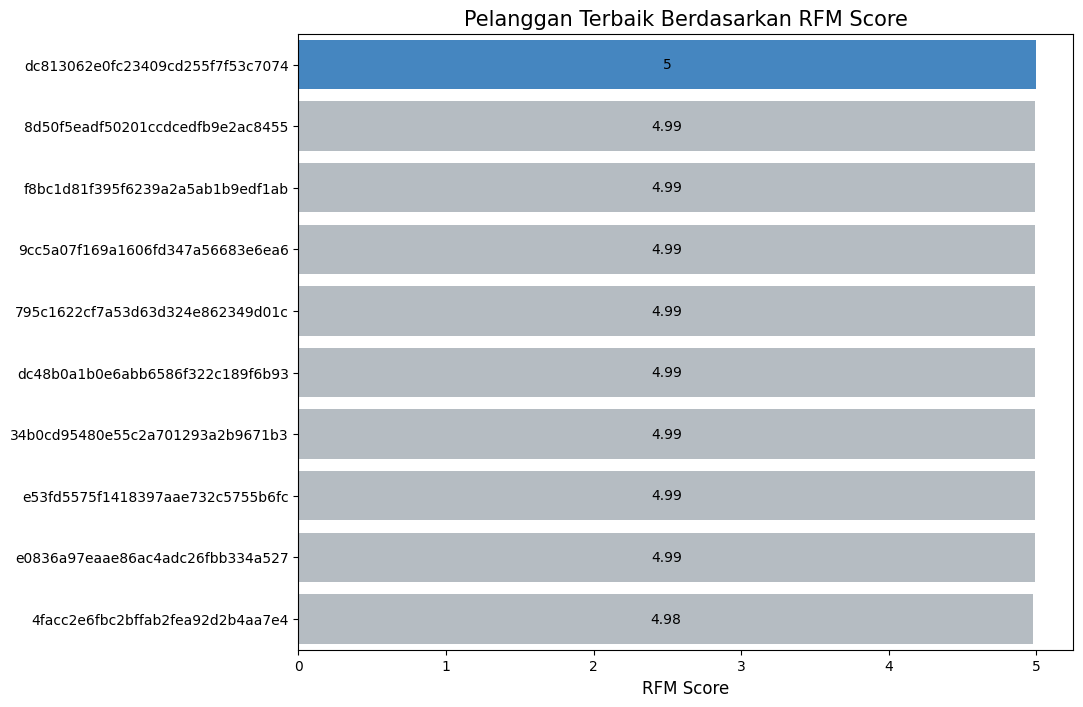

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x="RFM_Score", y="customer_unique_id", data= df_rfm.sort_values(by=['RFM_Score', 'monetary'],ascending=False).head(10), palette=colors)
ax.set_ylabel(None)
ax.set_xlabel('RFM Score', fontsize=12)
ax.set_title("Pelanggan Terbaik Berdasarkan RFM Score", loc="center", fontsize=15)
ax.bar_label(ax.containers[0], label_type='center')
ax.tick_params(axis ='y', labelsize=10)

In [90]:
df_all_joined.to_csv("all_data.csv", index=False)

**Conclusion**

**1. Mengidentifikasi kategori produk dengan total penjualan paling banyak dan paling sedikit yang dilakukan oleh customers!**

  Kategori produk berdasarkan pada total penjualan paling banyak adalah Bed Bath Table sebanyak 11552 pesanan. Sedangkan kategori dengan total penjumlahan paling sedkit adalah kategori Security and Services sebanyak 2 pesanan.

**2. Tipe Transaksi Apa yang Paling diminati oleh Customers?**

   Berdasarkan pada table payment jenis tipe transaksi yang paling diminati adalah menggunakan credit card dengan total mencapai 75% dari customer menggunakan tipe transaksi credit card.

**3. Mengidentifikasi Daerah dengan Tingkat Customer Paling Tinggi!**

  Persebaran pelanggan dengan tingkat customer paling tinggi berdasarkan kota yaitu berasal dari kota Sao Paulo sedangkan berdarkan pada negara bagian yaitu berasal dari negara dengan singakatan SP (Sao Paulo).

**4. 3 Pelanggan Terbaik Berdasarkan pada recency, frequency, dan monetary (RFM) Score!**

  Berdasarkan pada hasil analisis RFM, pelanggan terbaik menurut RFM Score tertinggi yaitu pelanggan dengan ID dc813062e0fc23409cd255f7f53c7074, pelanggan dengan ID 8d50f5eadf50201ccdcedfb9e2ac8455 adalah pelanggan terbaik ke-2, pelanggan dengan ID f8bc1d81f395f6239a2a5ab1b9edf1ab adalah pelanggan terbaik ke-3.